In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from itertools import combinations
from scipy import stats
import numpy as np

In [12]:
data = pd.read_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/output.csv')
print(data.head()) 

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [13]:
summary_statistics = data.describe()
#percentiles
target_distribution = data['prognosis'].value_counts()
summary_statistics, target_distribution

(           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
 count  4920.000000  4920.000000           4920.000000          4920.000000   
 mean      0.137805     0.159756              0.021951             0.045122   
 std       0.344730     0.366417              0.146539             0.207593   
 min       0.000000     0.000000              0.000000             0.000000   
 25%       0.000000     0.000000              0.000000             0.000000   
 50%       0.000000     0.000000              0.000000             0.000000   
 75%       0.000000     0.000000              0.000000             0.000000   
 max       1.000000     1.000000              1.000000             1.000000   
 
          shivering       chills   joint_pain  stomach_pain      acidity  \
 count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
 mean      0.021951     0.162195     0.139024      0.045122     0.045122   
 std       0.146539     0.368667     0.346007      0.207593

In [15]:
sum_by_prognosis = data.groupby('prognosis').sum()
average_by_prognosis = data.groupby('prognosis').mean()

sum_by_prognosis

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,114,0,0,0,0,0,0,0,0,...,108,108,108,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,108,108,108,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicken pox,114,114,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
average_by_prognosis

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AIDS,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Acne,0.00,0.95,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.9,0.9,0.9,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Alcoholic hepatitis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Allergy,0.00,0.00,0.0,0.90,0.9,0.90,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arthritis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bronchial Asthma,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cervical spondylosis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chicken pox,0.95,0.95,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [71]:
# Identifying the top 5 symptoms for each prognosis
# Removing 'severity_score' from the top symptoms list if it appears
sum_by_prognosis_filtered = sum_by_prognosis

top_symptoms_by_prognosis_filtered = sum_by_prognosis_filtered.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

top_symptoms_df_filtered = pd.DataFrame(top_symptoms_by_prognosis_filtered, columns=['Top 5 Symptoms'])

# Display the full list without truncating
pd.set_option('display.max_colwidth', None)
print(top_symptoms_df_filtered)
top_symptoms_df_filtered.to_csv('top_symptoms_for_prognosis.csv')

                                                                                                                             Top 5 Symptoms
prognosis                                                                                                                                  
(vertigo) Paroymsal  Positional Vertigo                                         [vomiting, headache, nausea, loss_of_balance, unsteadiness]
AIDS                                                       [high_fever, muscle_wasting, patches_in_throat, extra_marital_contacts, itching]
Acne                                                                         [skin_rash, pus_filled_pimples, blackheads, scurring, itching]
Alcoholic hepatitis                                  [vomiting, yellowish_skin, abdominal_pain, swelling_of_stomach, distention_of_abdomen]
Allergy                                                               [continuous_sneezing, shivering, chills, watering_from_eyes, itching]
Arthritis           

In [78]:
# saving the top 5 symtoms by each prognosis into a csv file
import re
# Load the dataset
df = pd.read_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/top_symptoms_for_prognosis.csv')  # Replace 'your_file.csv' with the actual file path
df['Top 5 Symptoms'] = df['Top 5 Symptoms'].apply(lambda x: re.sub(r"[\'\[\]]", '', x))

# Split the 'Symptoms' column into multiple columns based on spaces (after removing commas)
df_split = df['Top 5 Symptoms'].str.split(expand=True)

# Combine with the original DataFrame (excluding the original 'Symptoms' column)
df_final = pd.concat([df.drop(columns=['Top 5 Symptoms']), df_split], axis=1)

# Save the final DataFrame with individual symptom columns to a new CSV file
df_final.to_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/split_symptoms_by_prognosis.csv', index=False)

# Display the first few rows of the final DataFrame
print(df_final.head())


                                 prognosis                     0  \
0  (vertigo) Paroymsal  Positional Vertigo             vomiting,   
1                                     AIDS           high_fever,   
2                                     Acne            skin_rash,   
3                      Alcoholic hepatitis             vomiting,   
4                                  Allergy  continuous_sneezing,   

                     1                   2                        3  \
0            headache,             nausea,         loss_of_balance,   
1      muscle_wasting,  patches_in_throat,  extra_marital_contacts,   
2  pus_filled_pimples,         blackheads,                scurring,   
3      yellowish_skin,     abdominal_pain,     swelling_of_stomach,   
4           shivering,             chills,      watering_from_eyes,   

                       4     5  
0           unsteadiness  None  
1                itching  None  
2                itching  None  
3  distention_of_abdomen  None  

In [84]:
#Most common symptoms across all the prognosis.


all_symptoms = df_final[[0, 1, 2, 3, 4]].values.flatten()
all_symptoms = [symptom for symptom in all_symptoms if pd.notna(symptom)]

# Count the frequency of each symptom
symptom_counts = Counter(all_symptoms)

# Identify the most common symptoms
most_common_symptoms = symptom_counts.most_common()

df = pd.DataFrame(most_common_symptoms)

df.to_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/most_common_symptoms.csv', index=False)


# Display the most common symptoms and their counts
print("Most common symptoms across prognoses:")
for symptom, count in most_common_symptoms:
    print(f"{symptom}: {count}")

Most common symptoms across prognoses:
vomiting,: 11
itching: 7
fatigue,: 7
skin_rash,: 6
headache,: 5
itching,: 5
nausea,: 4
high_fever,: 4
yellowish_skin,: 4
chills,: 4
loss_of_appetite,: 4
chest_pain,: 4
yellowing_of_eyes,: 4
joint_pain,: 4
loss_of_balance,: 3
abdominal_pain,: 3
fatigue: 3
muscle_weakness,: 2
breathlessness,: 2
neck_pain,: 2
malaise,: 2
weight_loss,: 2
stomach_pain,: 2
burning_micturition,: 2
acidity,: 2
irritability,: 2
vomiting: 2
high_fever: 2
muscle_pain,: 2
mild_fever,: 2
unsteadiness: 1
muscle_wasting,: 1
patches_in_throat,: 1
extra_marital_contacts,: 1
pus_filled_pimples,: 1
blackheads,: 1
scurring,: 1
swelling_of_stomach,: 1
distention_of_abdomen: 1
continuous_sneezing,: 1
shivering,: 1
watering_from_eyes,: 1
stiff_neck,: 1
swelling_joints,: 1
movement_stiffness,: 1
painful_walking: 1
family_history,: 1
mucoid_sputum,: 1
dizziness,: 1
back_pain,: 1
weakness_in_limbs: 1
red_spots_over_body,: 1
loss_of_appetite: 1
phlegm,: 1
throat_irritation,: 1
redness_of_ey

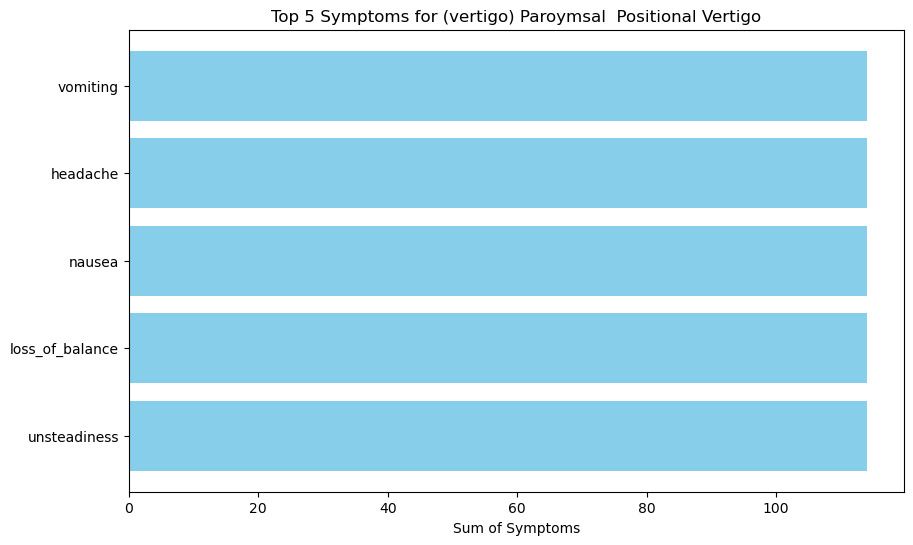

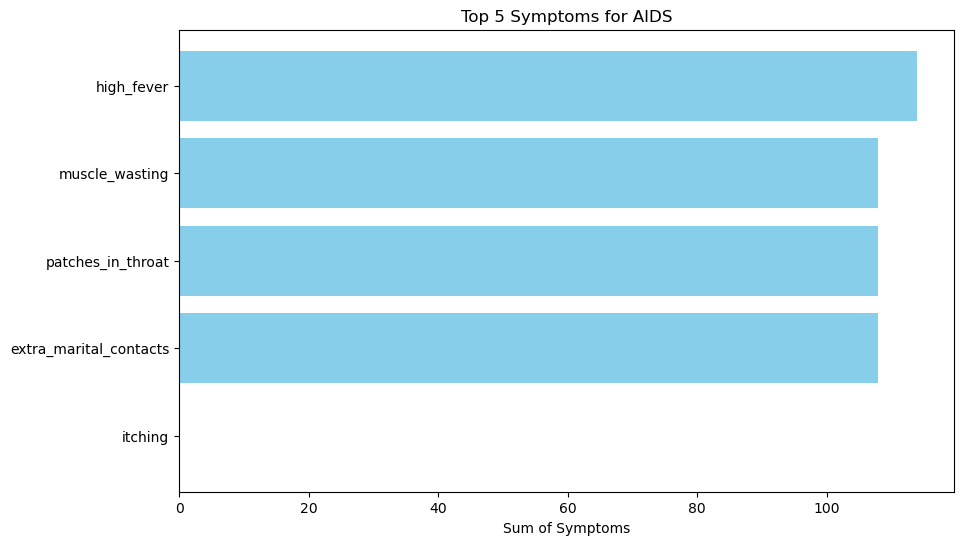

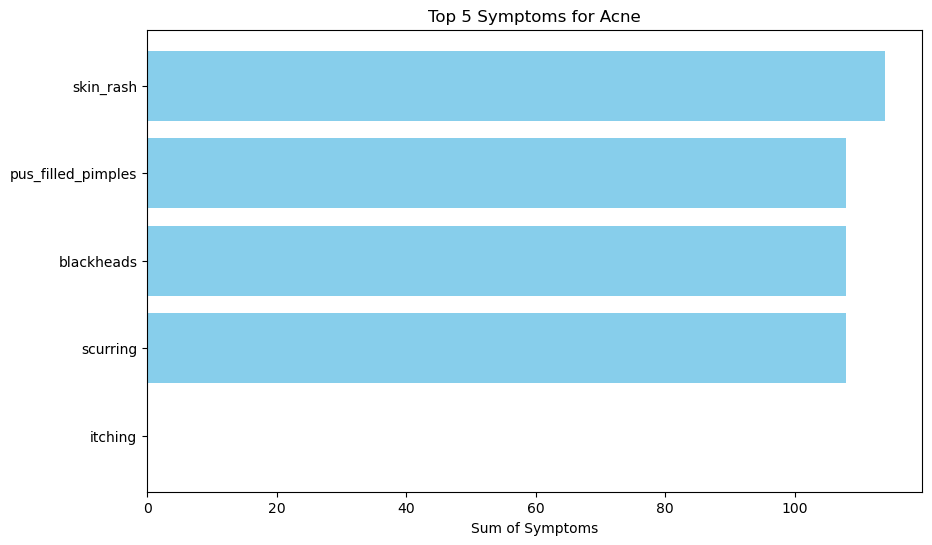

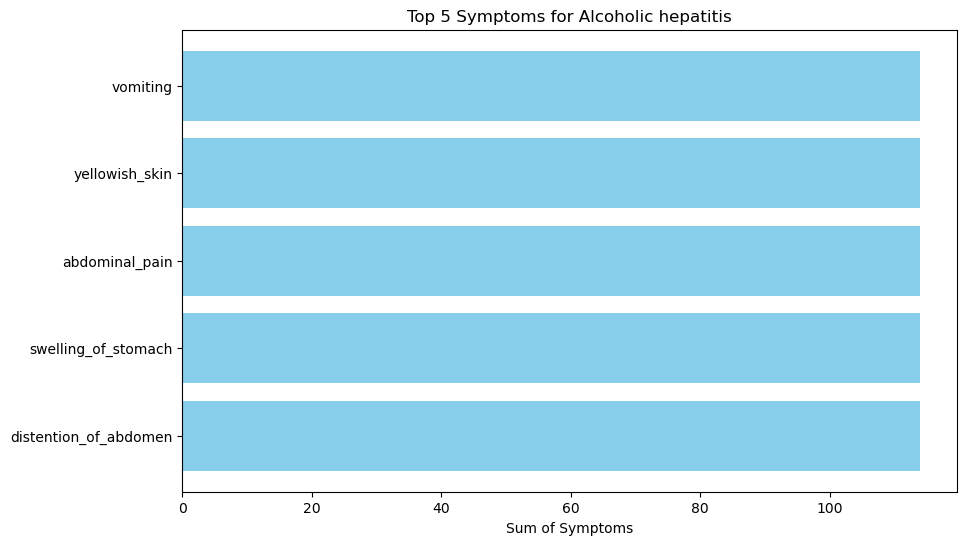

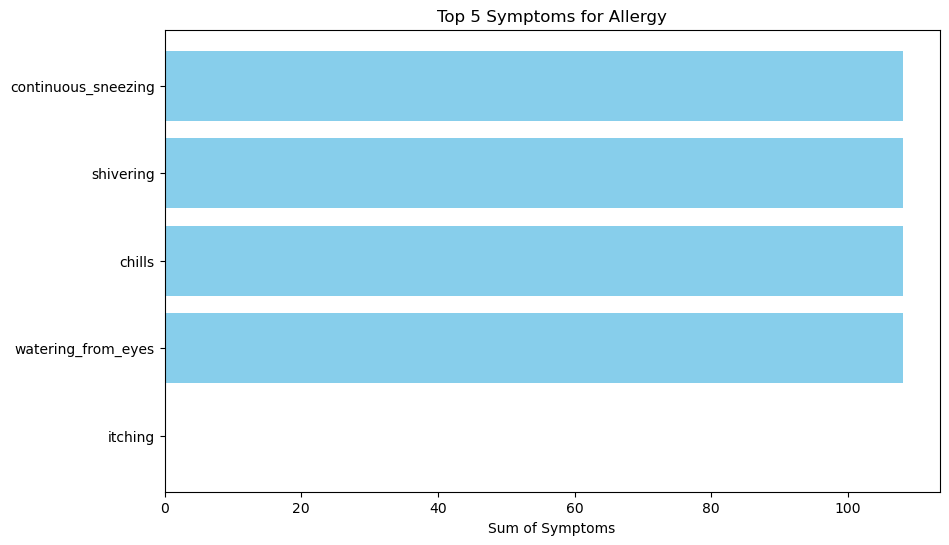

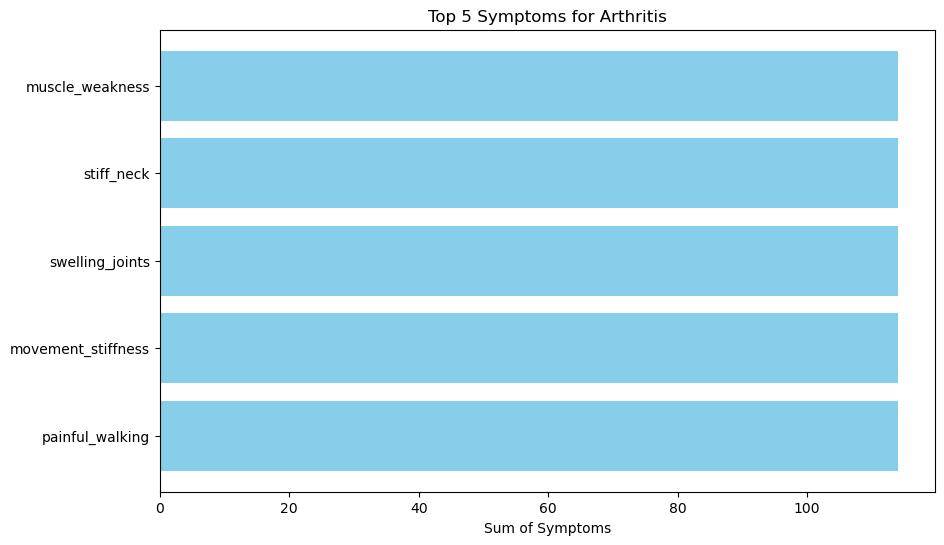

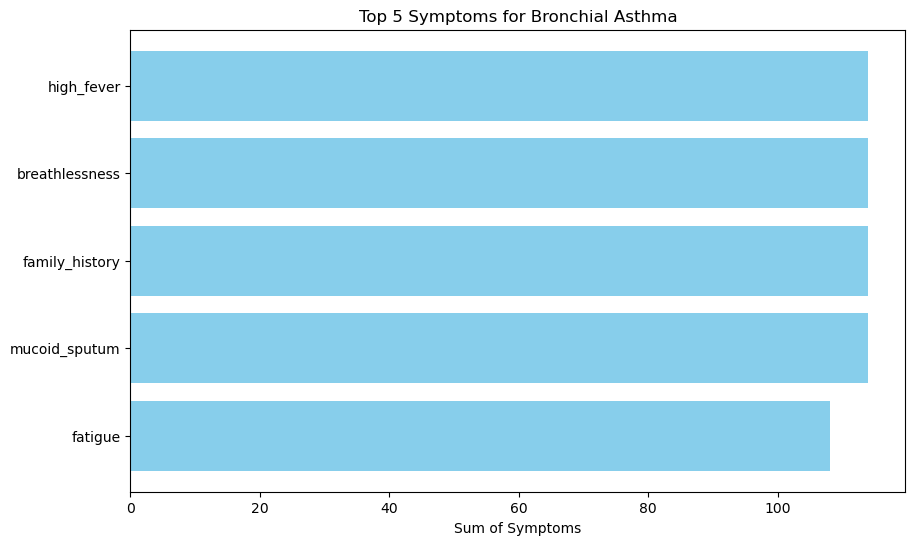

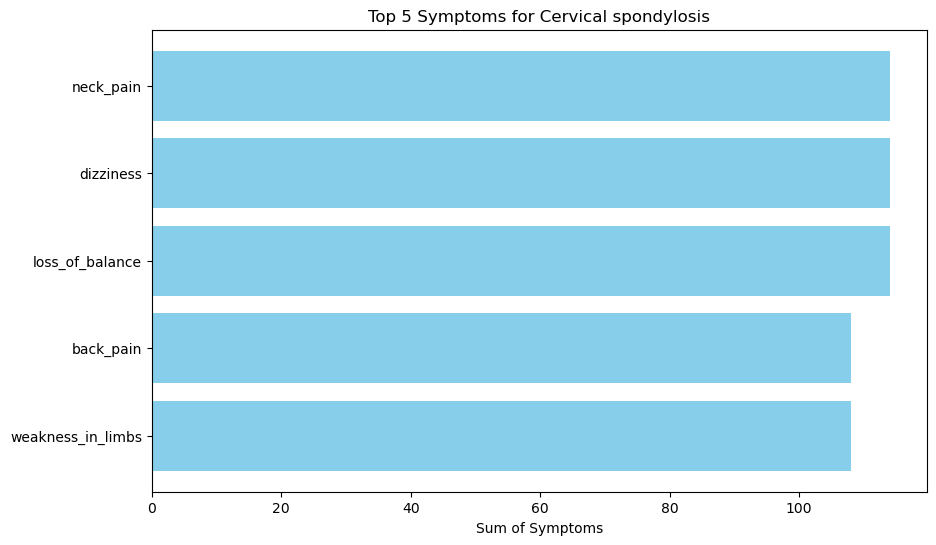

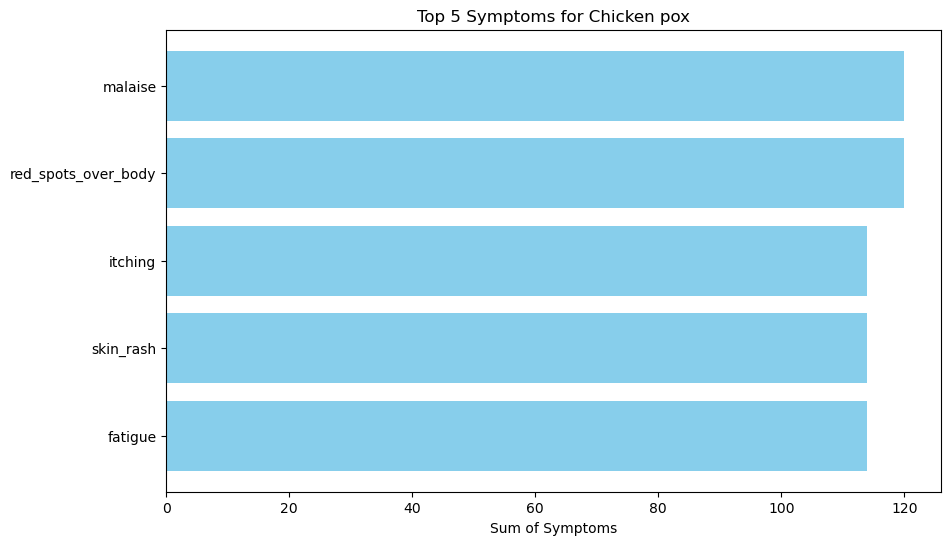

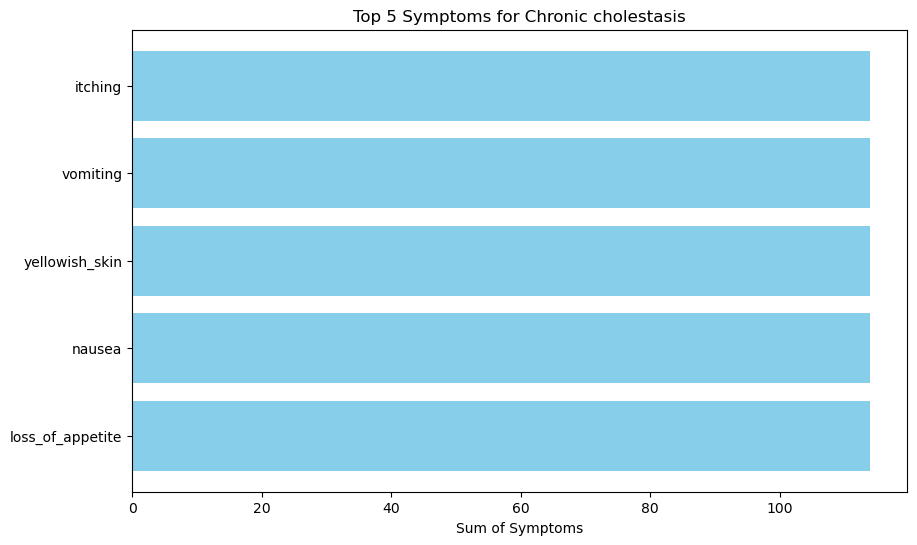

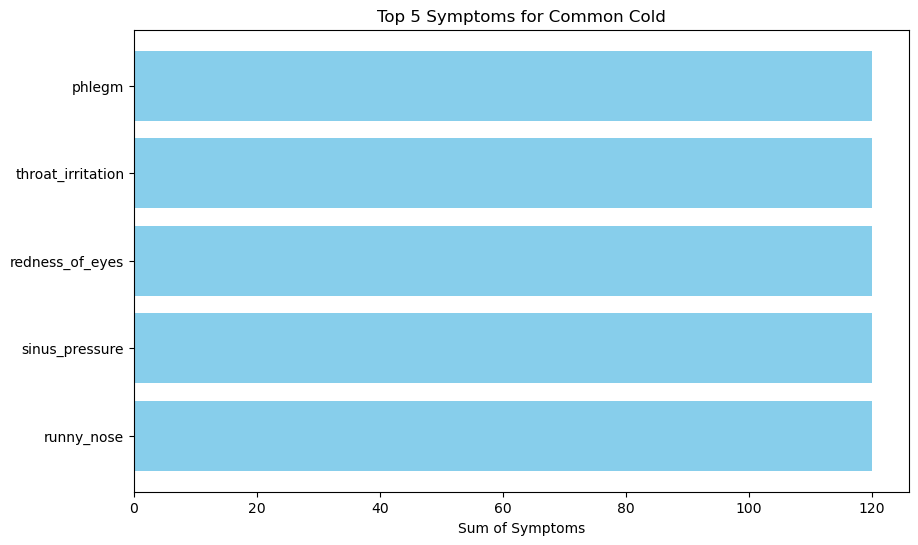

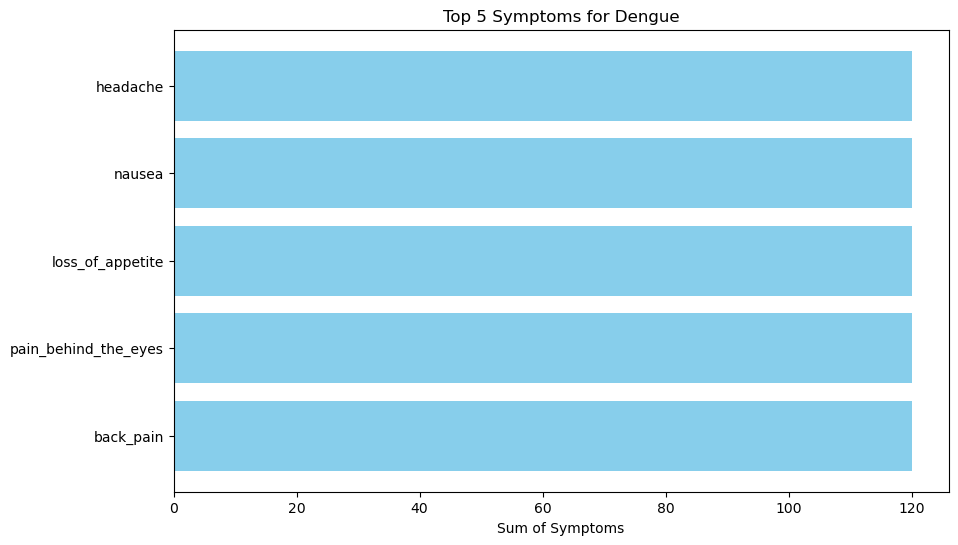

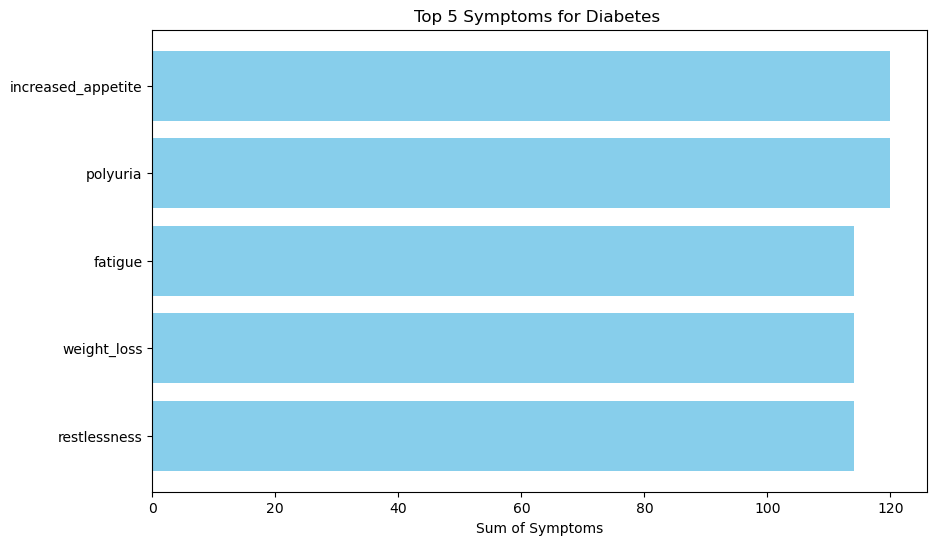

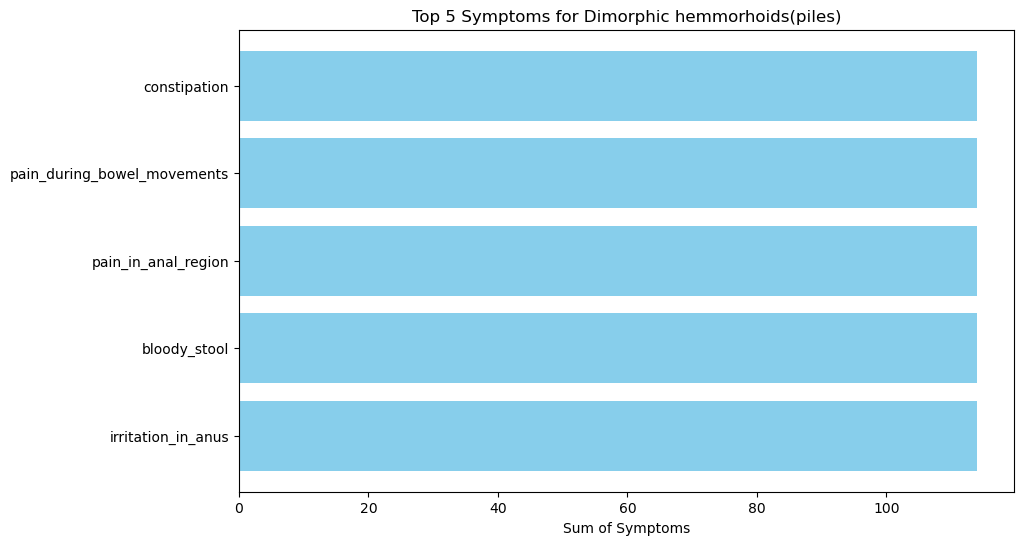

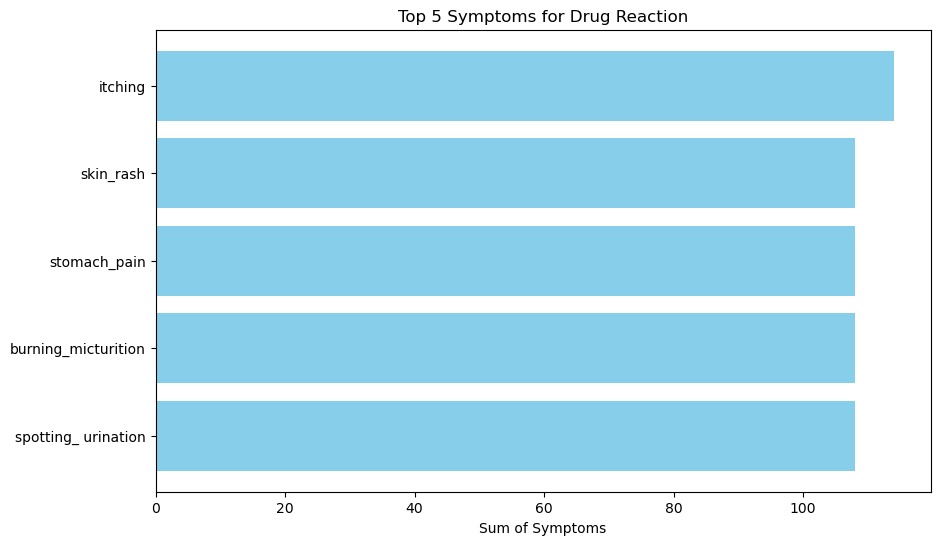

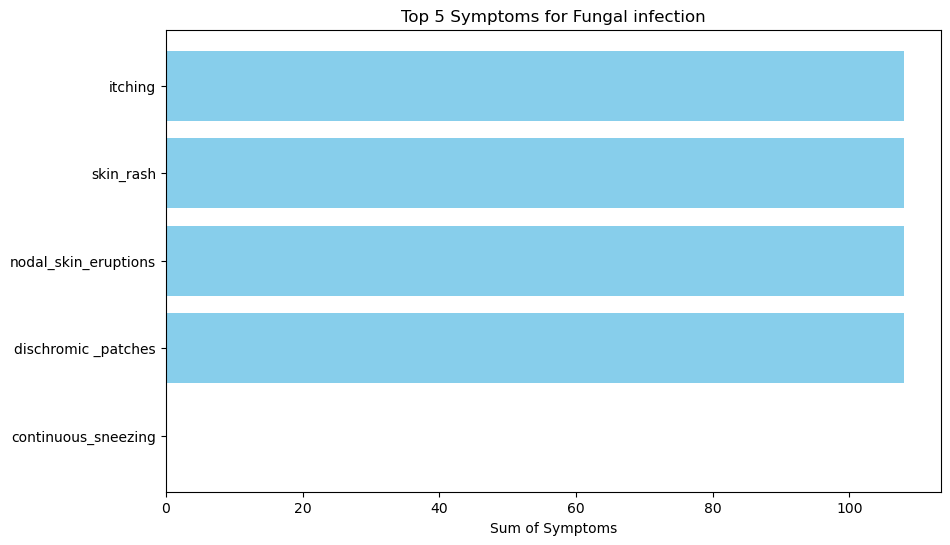

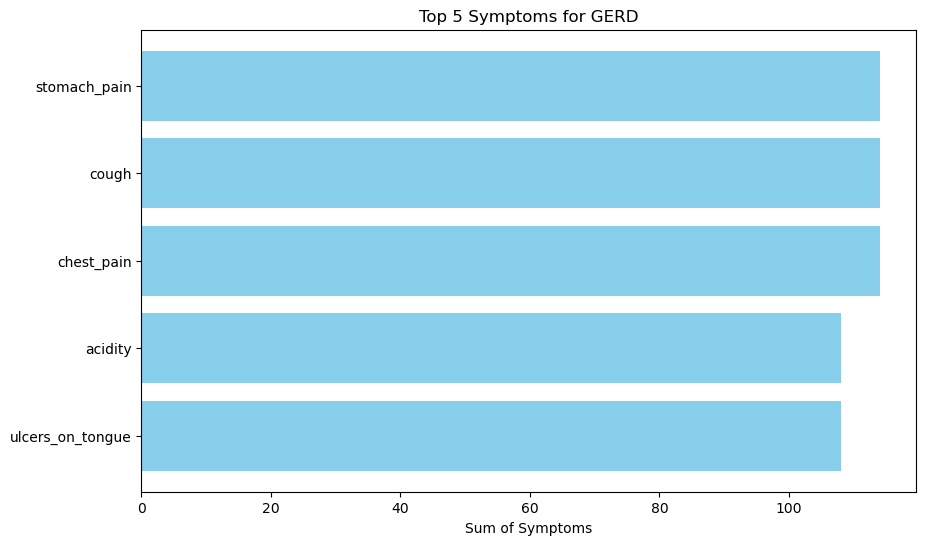

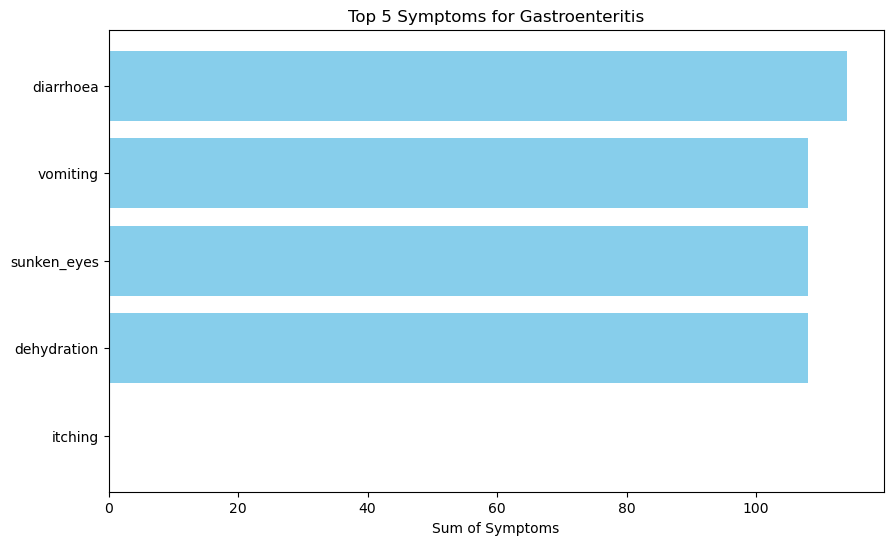

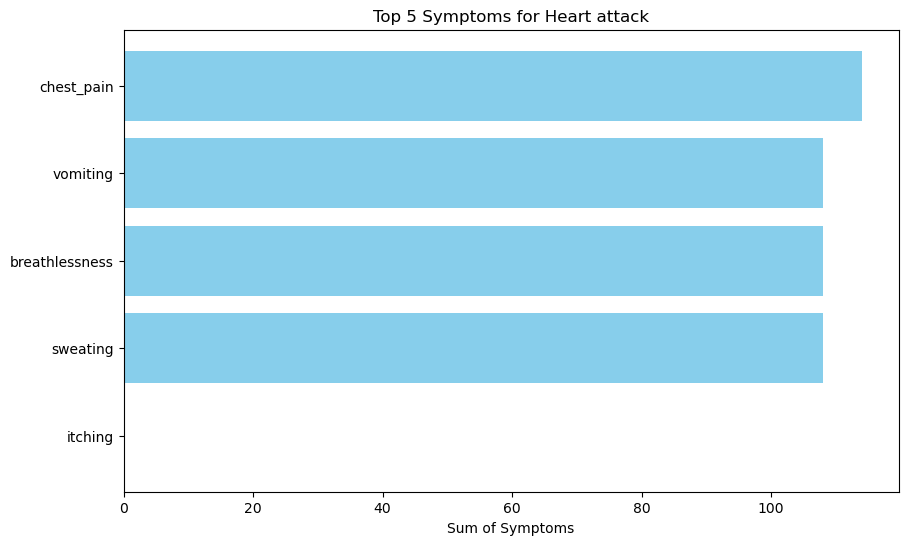

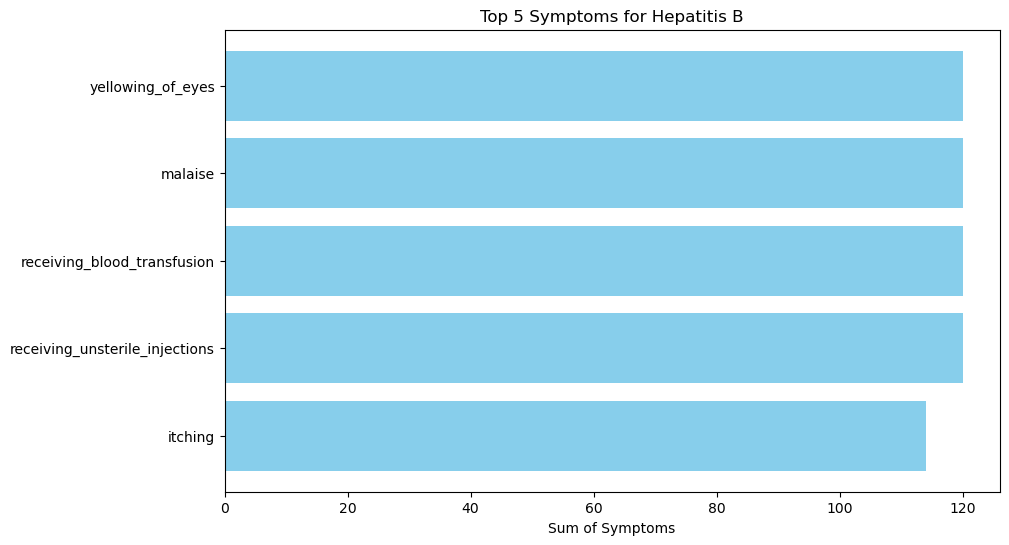

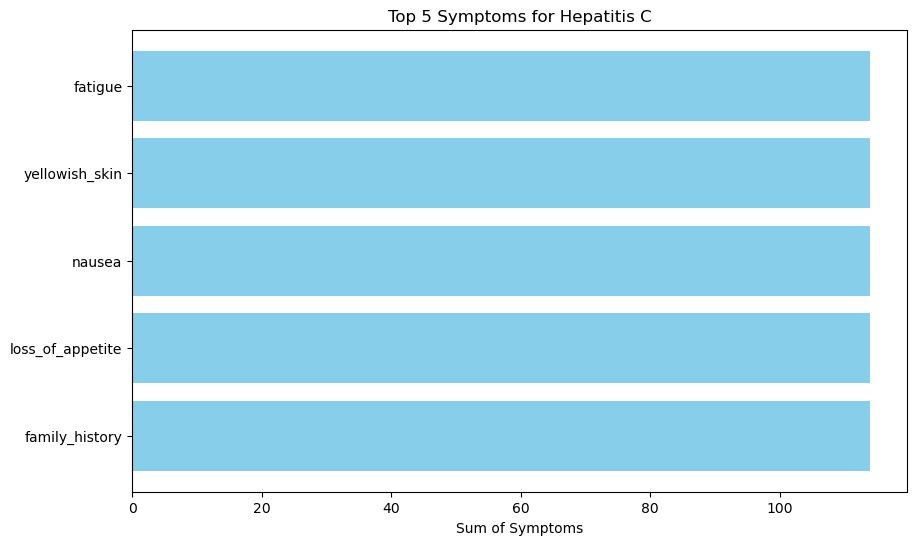

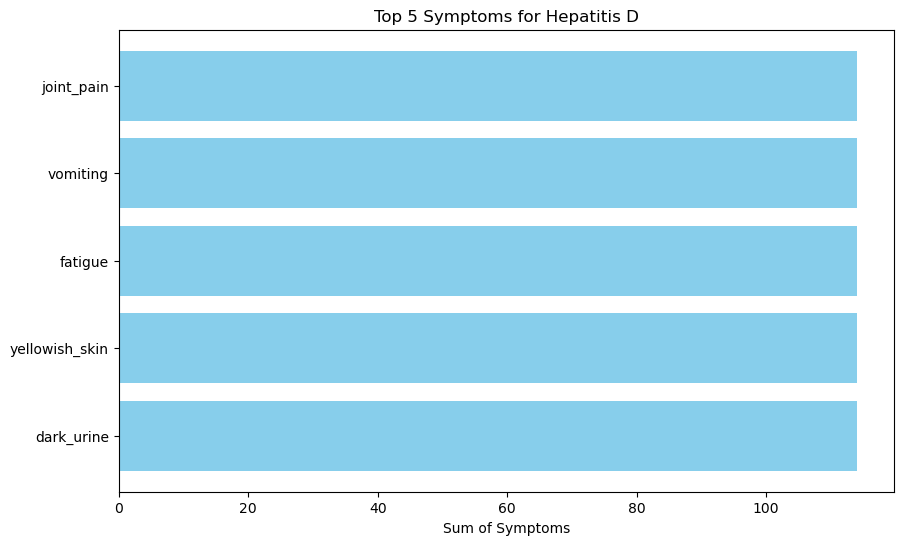

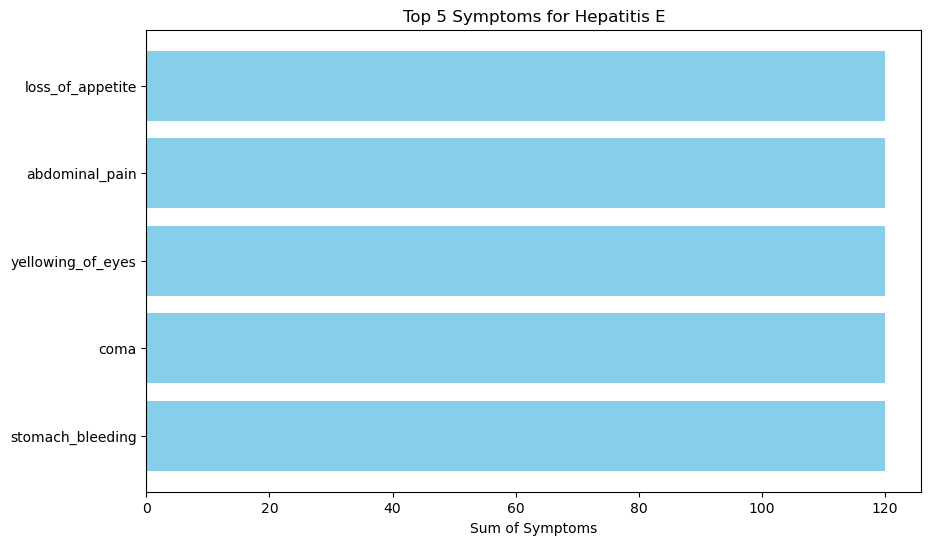

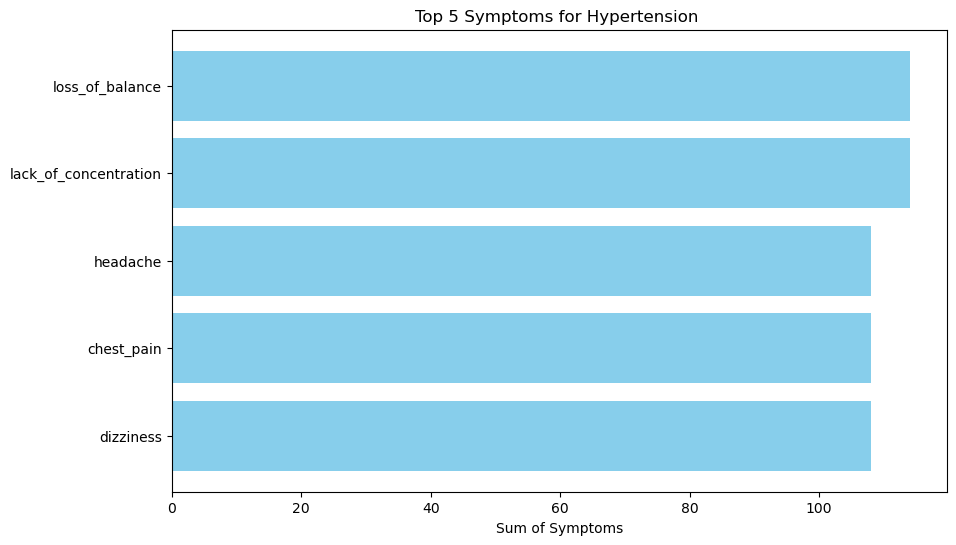

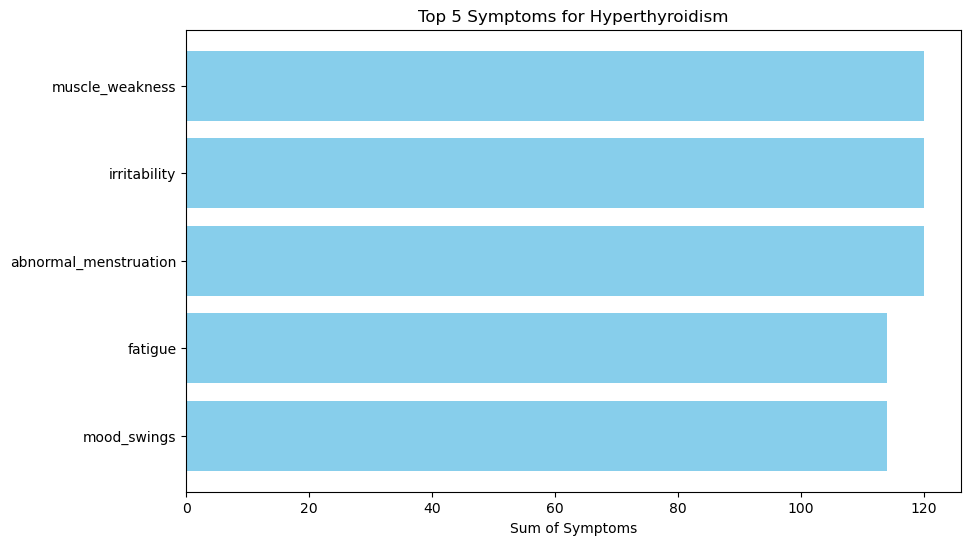

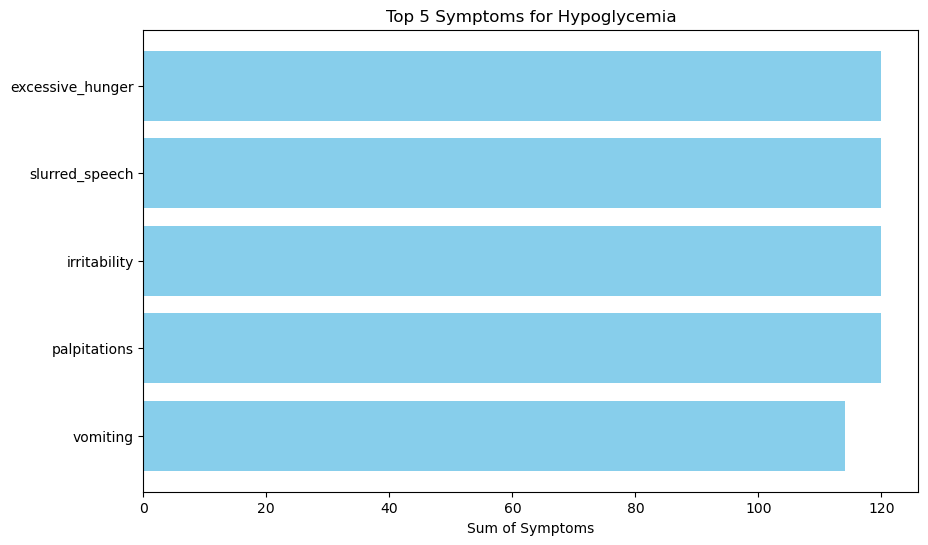

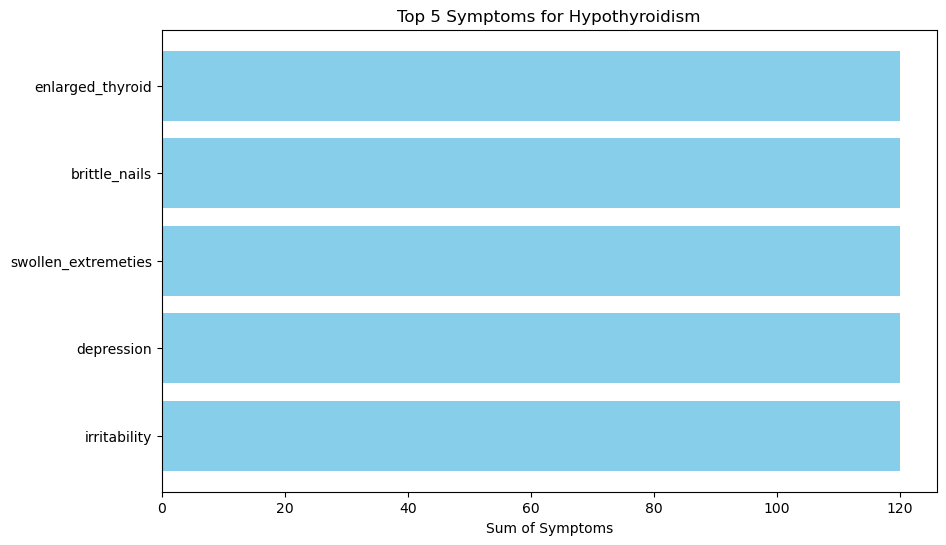

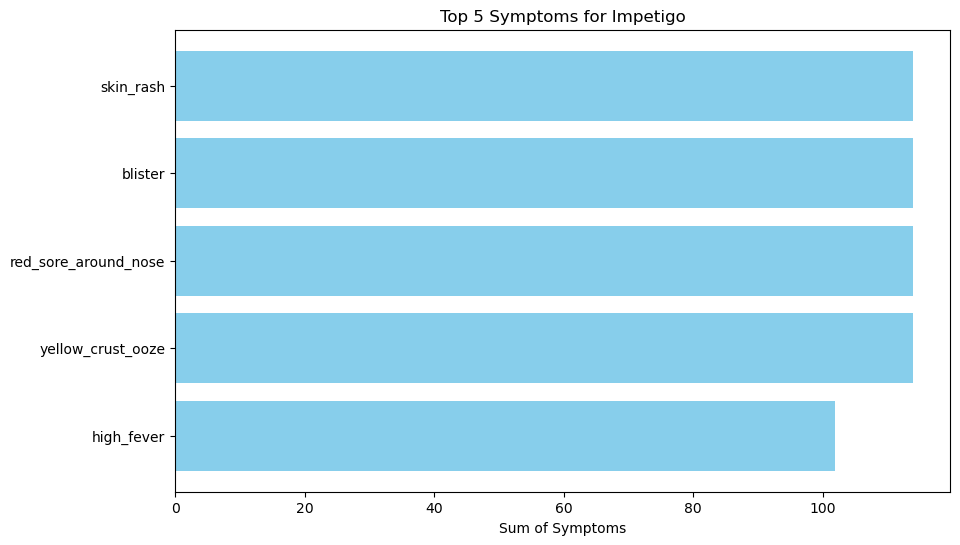

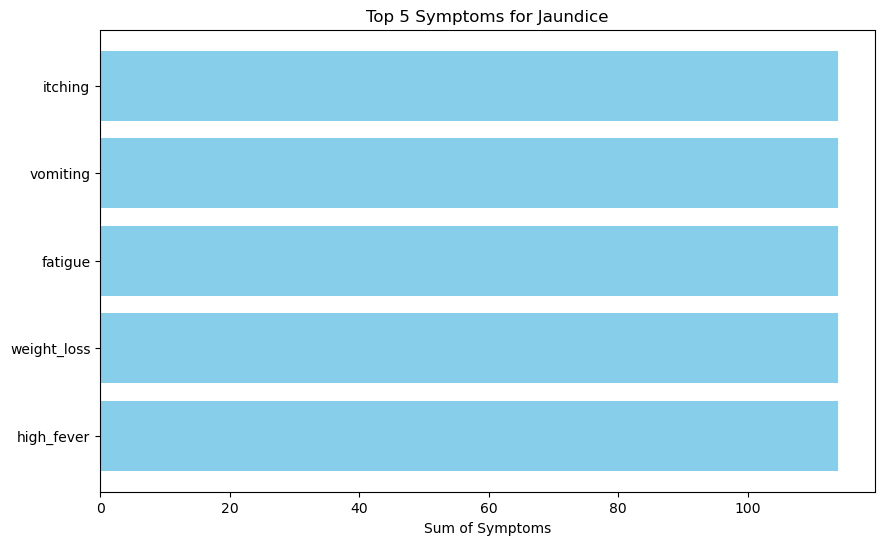

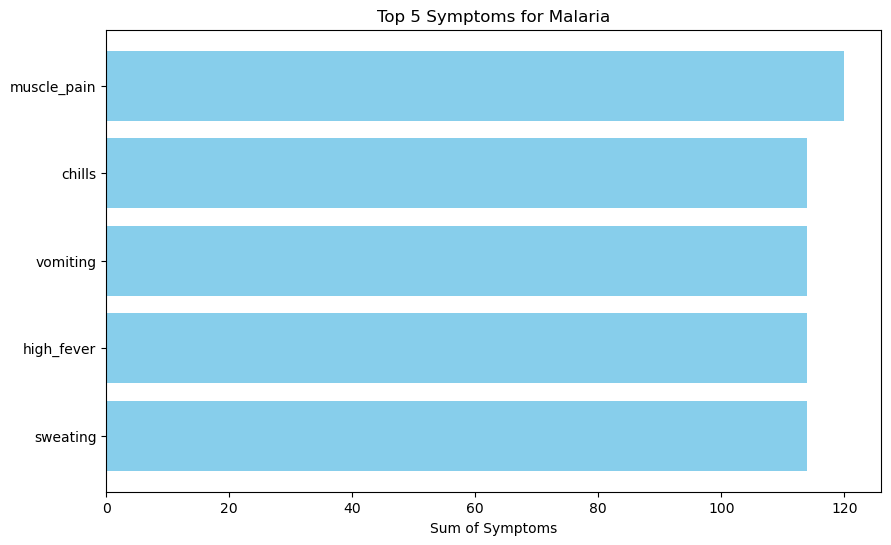

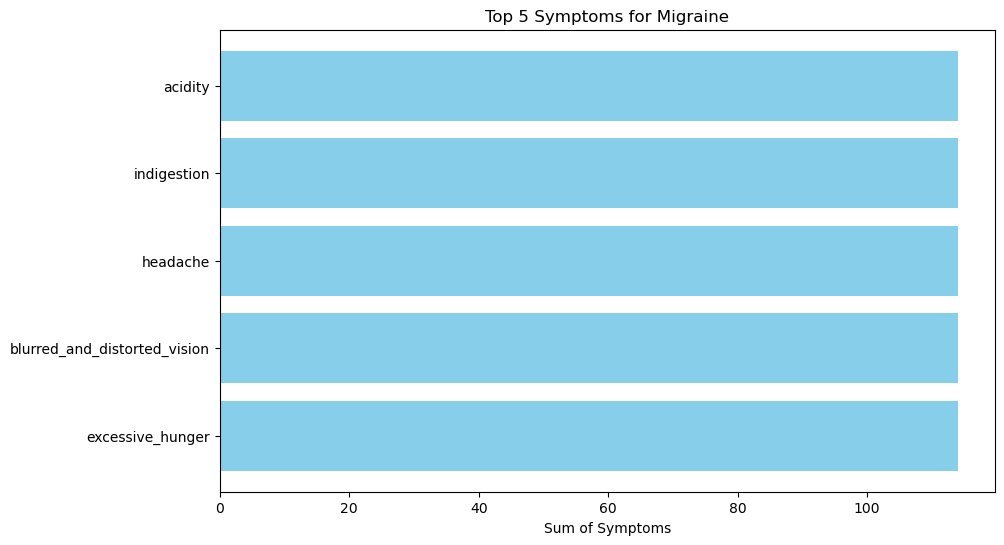

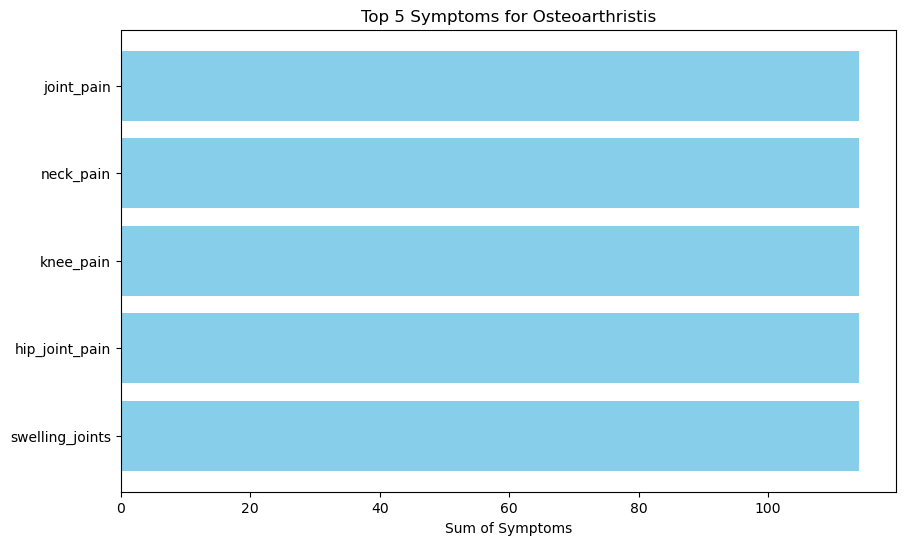

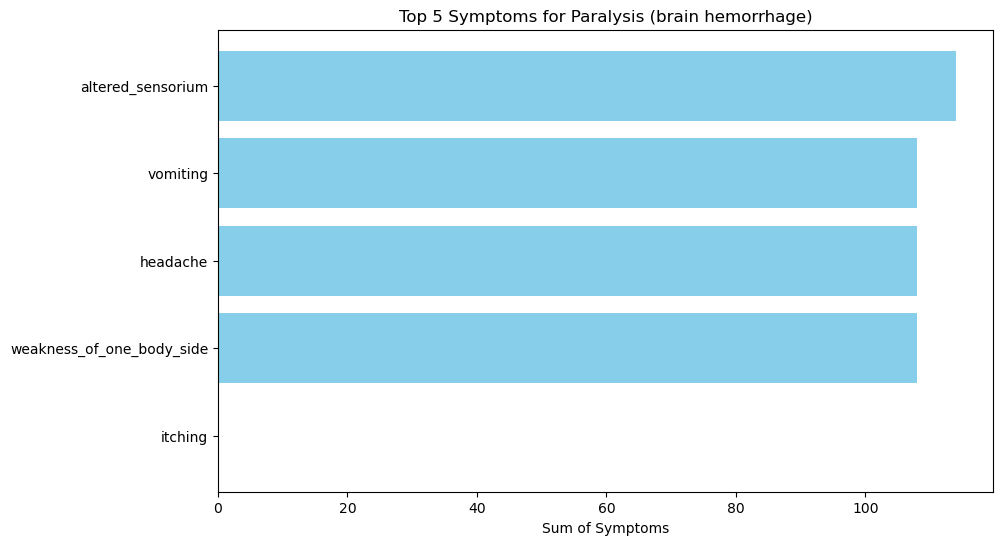

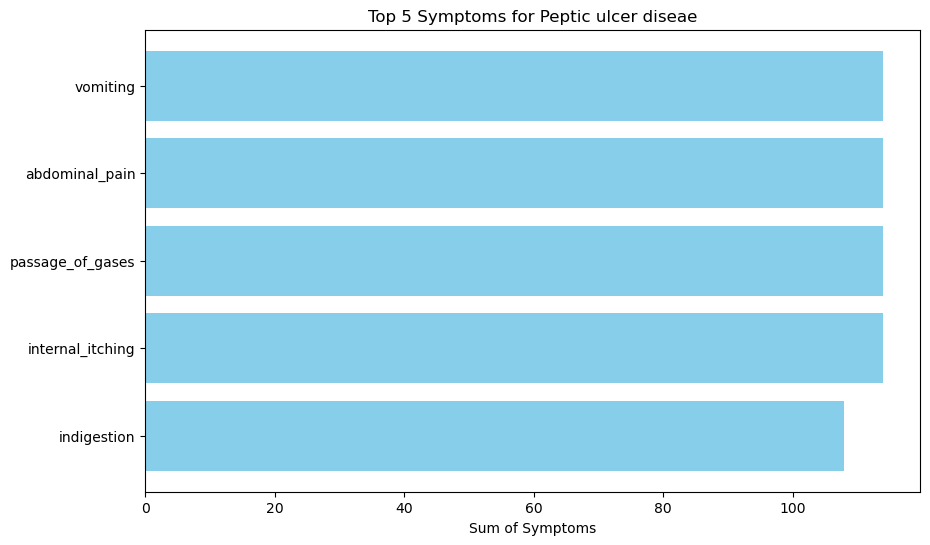

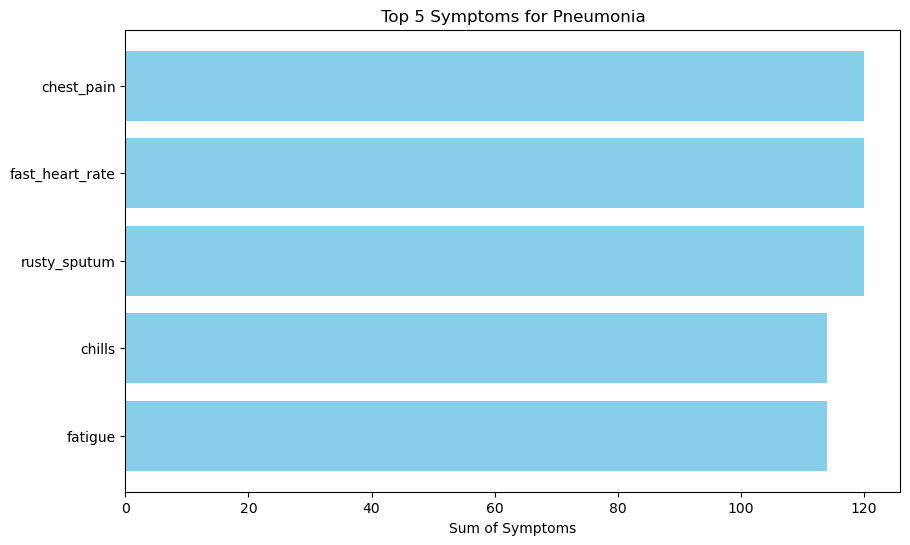

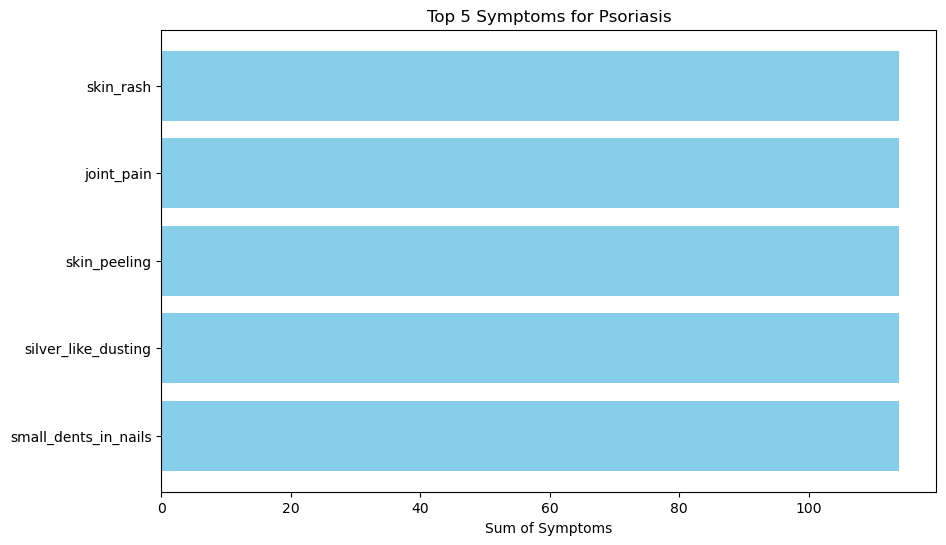

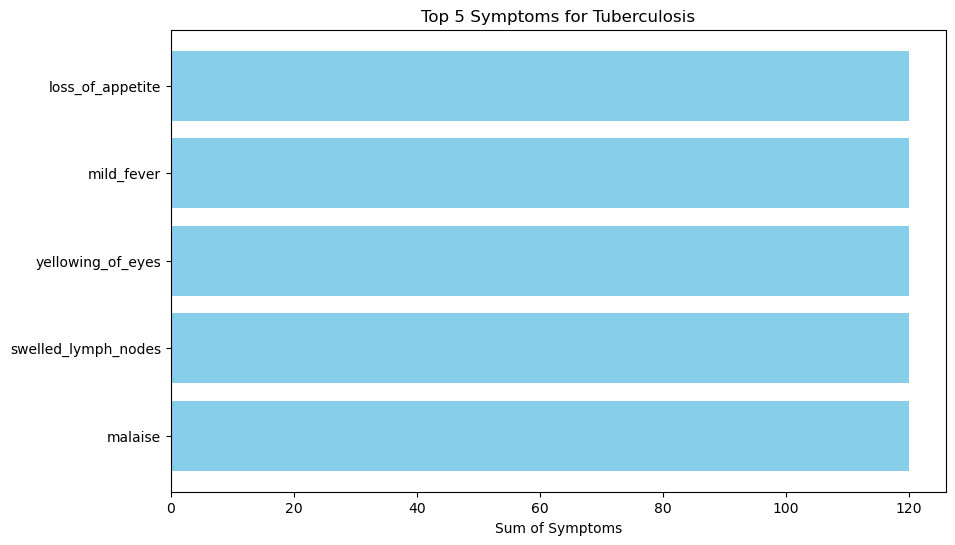

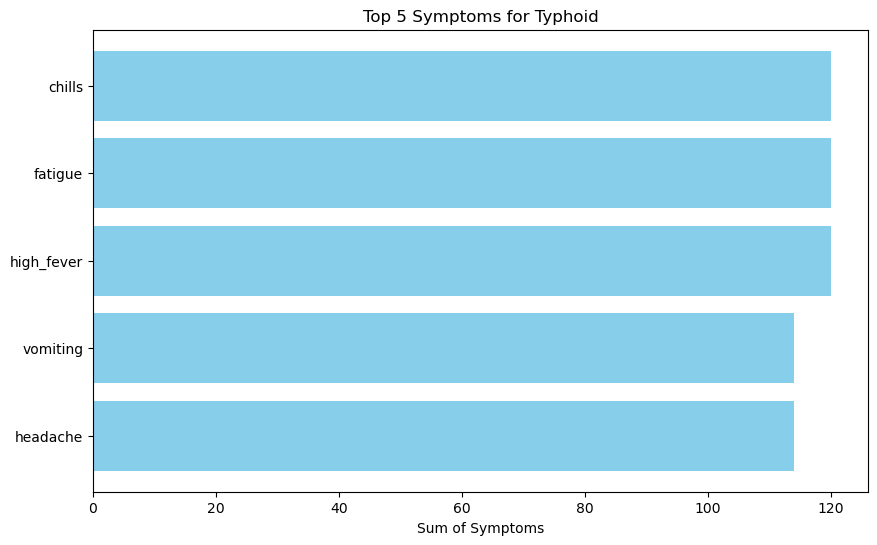

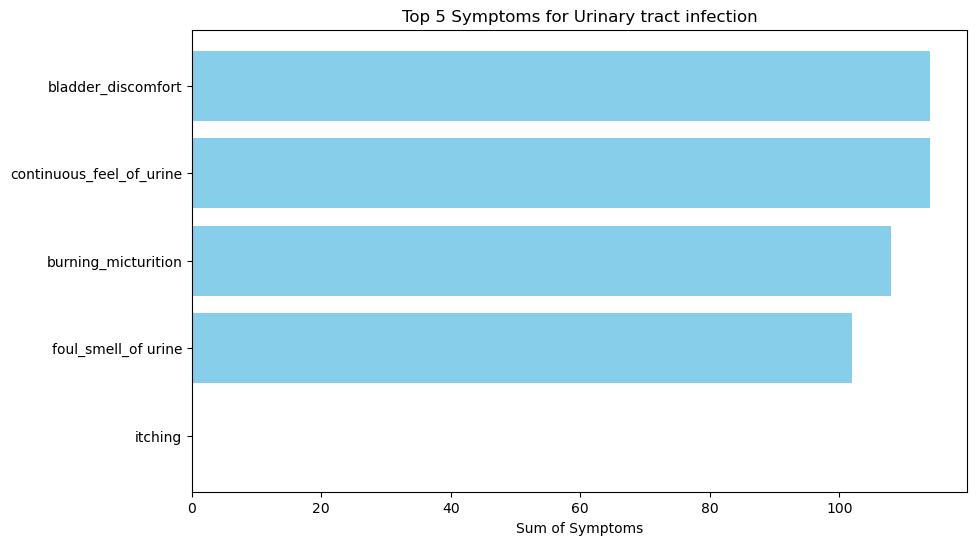

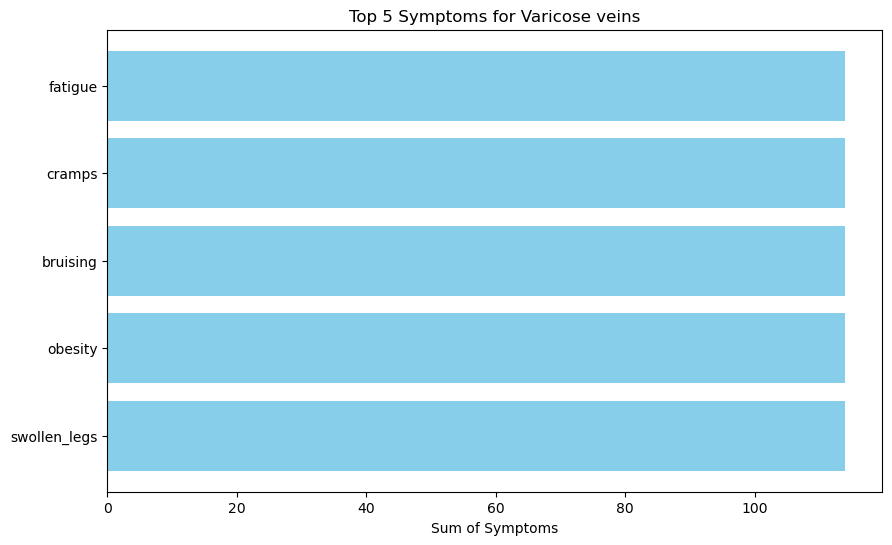

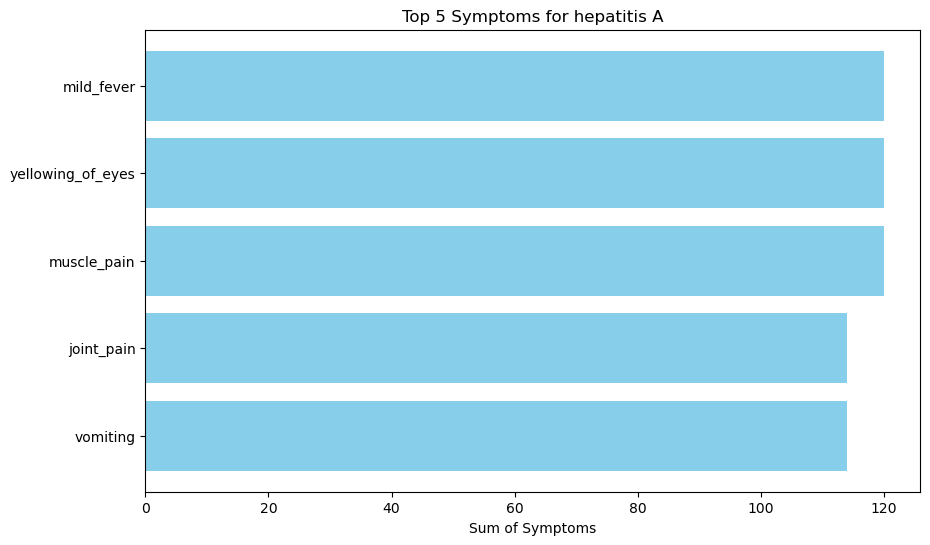

In [39]:
# visualize the top 5 symptoms by prognosis
import matplotlib.pyplot as plt

# Loop through each prognosis and its top symptoms
for prognosis, symptoms in top_symptoms_by_prognosis_filtered.items():
    # Get the corresponding values for the top symptoms
    values = sum_by_prognosis_filtered.loc[prognosis, symptoms]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(symptoms, values, color='skyblue')
    plt.xlabel('Sum of Symptoms')
    plt.title(f'Top 5 Symptoms for {prognosis}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()


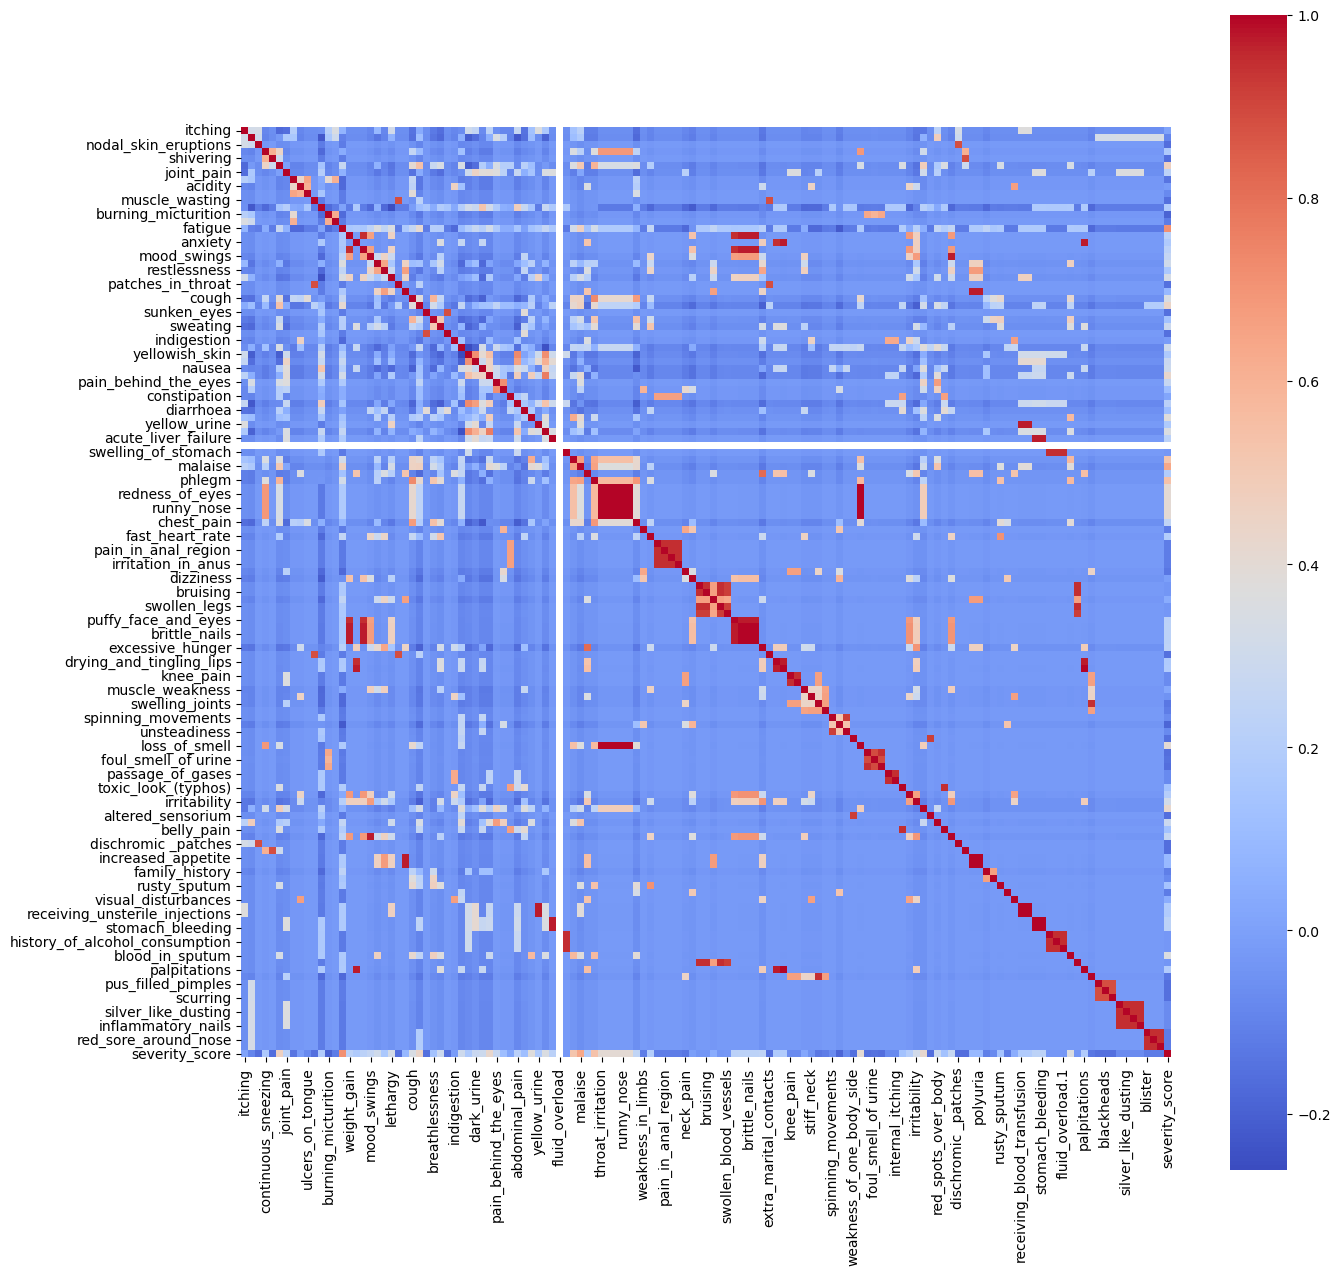

In [40]:
#correlation heat map
correlation_matrix = data.drop('prognosis', axis = 1).corr()

# Heatmap visualization
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

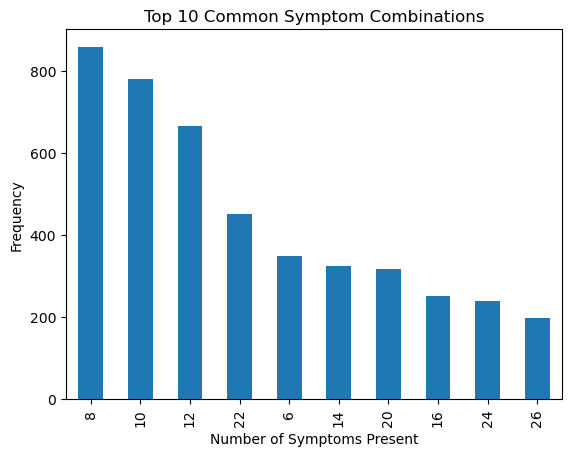

In [42]:
# Most common combinations of symptoms (top 10)
symptom_combinations = data.drop('prognosis', axis=1).sum(axis=1).value_counts().head(10)

symptom_combinations.plot(kind='bar')
plt.title('Top 10 Common Symptom Combinations')
plt.xlabel('Number of Symptoms Present')
plt.ylabel('Frequency')
plt.show()


In [43]:
# Calculating the sum of each symptom across all prognosis (i.e., across all rows)
total_symptoms_sum = data.drop('prognosis', axis=1).sum().sort_values(ascending=False)

# Display the top 10 most commonly occurring symptoms
top_common_symptoms = total_symptoms_sum.head(10)

# Display the results
print(top_common_symptoms)


severity_score       36648
fatigue               1932
vomiting              1914
high_fever            1362
loss_of_appetite      1152
nausea                1146
headache              1134
abdominal_pain        1032
yellowish_skin         912
yellowing_of_eyes      816
dtype: int64


In [44]:
# Calculating the sum of each symptom across all prognosis (i.e., across all rows)
total_symptoms_sum = data.drop('prognosis', axis=1).sum().sort_values(ascending=True)

# Display the top 10 most commonly occurring symptoms
least_common_symptoms = total_symptoms_sum.head(10)

# Display the results
print(least_common_symptoms)


fluid_overload              0
foul_smell_of urine       102
swollen_blood_vessels     108
pus_filled_pimples        108
blackheads                108
extra_marital_contacts    108
dehydration               108
scurring                  108
sunken_eyes               108
spinning_movements        108
dtype: int64


In [45]:


# Function to find common top symptoms between prognoses
def find_similar_prognoses(top_symptoms_dict):
    similar_prognoses = []
    for (prog1, symptoms1), (prog2, symptoms2) in combinations(top_symptoms_dict.items(), 2):
        common_symptoms = set(symptoms1).intersection(symptoms2)
        if len(common_symptoms) > 2:  # If 3 or more symptoms are common, consider them similar
            similar_prognoses.append((prog1, prog2, common_symptoms))
    return similar_prognoses

# Find similar prognoses
similar_prognoses = find_similar_prognoses(top_symptoms_by_prognosis_filtered)

# Display the results
for prog1, prog2, common_symptoms in similar_prognoses:
    print(f"{prog1} and {prog2} share the following top symptoms: {list(common_symptoms)}")


Chronic cholestasis and Hepatitis C share the following top symptoms: ['loss_of_appetite', 'yellowish_skin', 'nausea']
Jaundice and Typhoid share the following top symptoms: ['vomiting', 'fatigue', 'high_fever']
Malaria and Typhoid share the following top symptoms: ['chills', 'high_fever', 'vomiting']


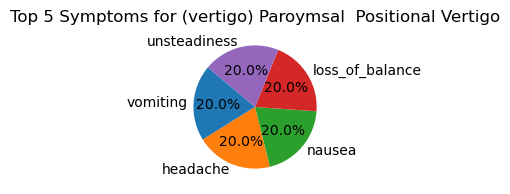

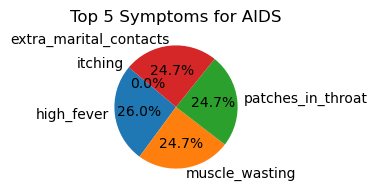

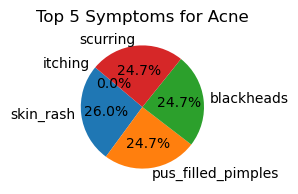

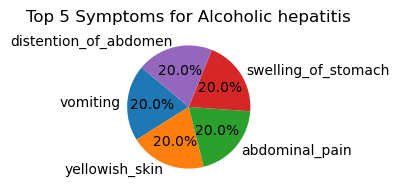

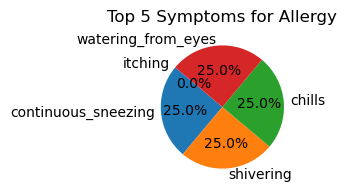

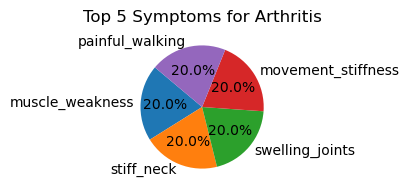

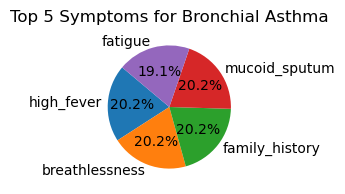

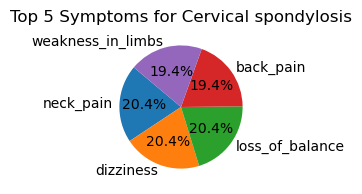

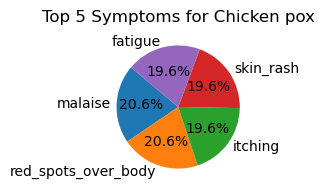

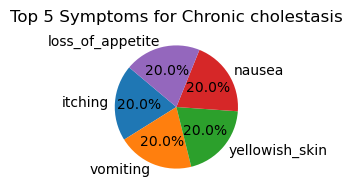

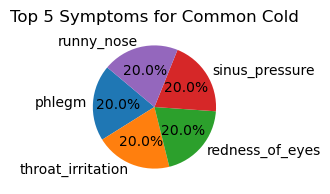

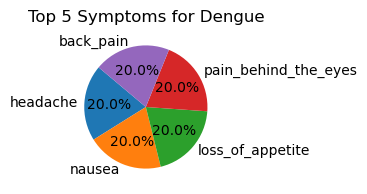

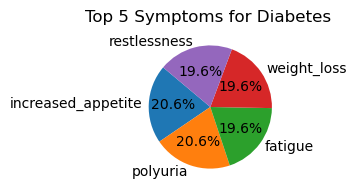

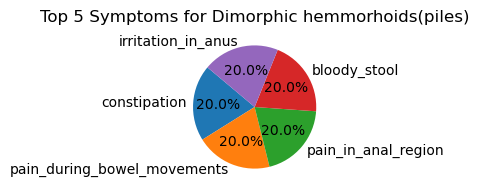

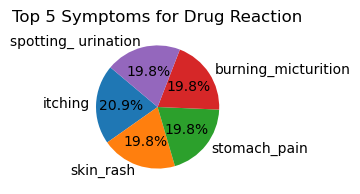

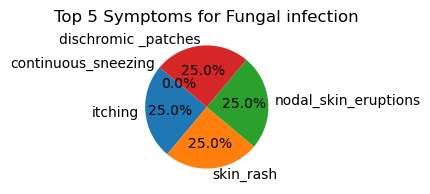

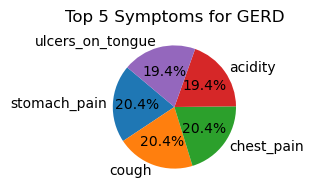

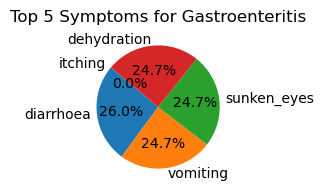

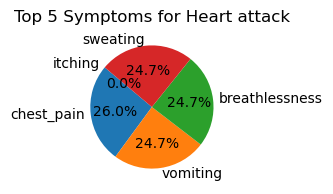

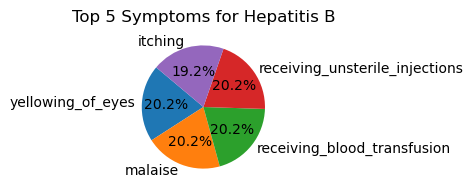

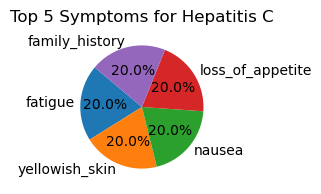

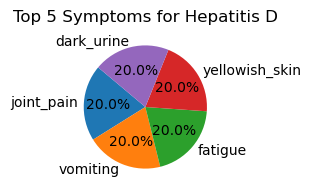

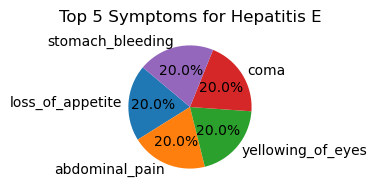

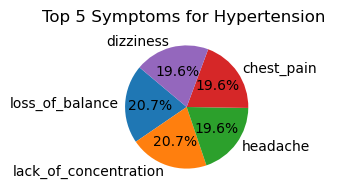

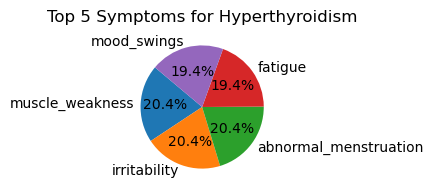

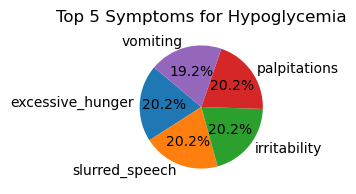

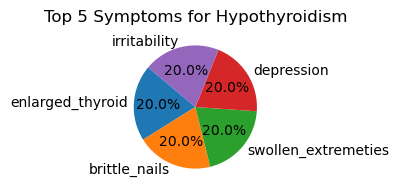

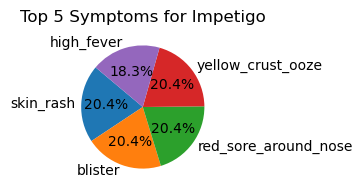

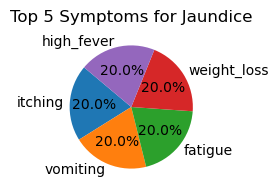

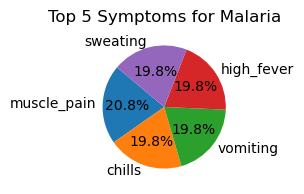

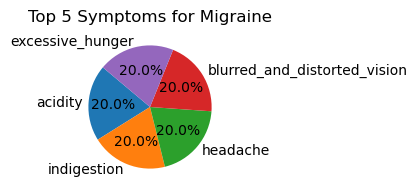

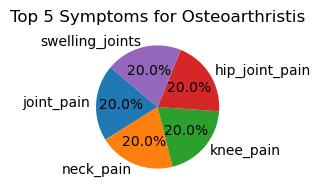

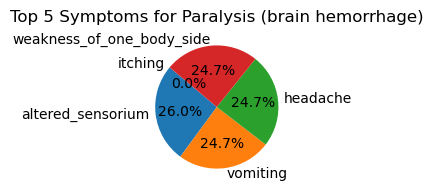

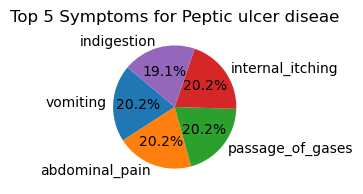

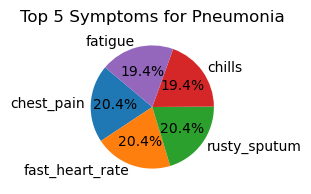

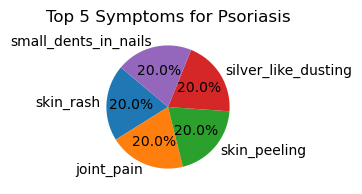

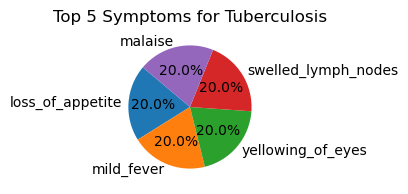

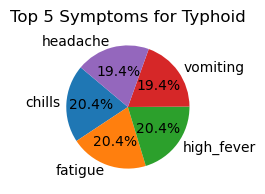

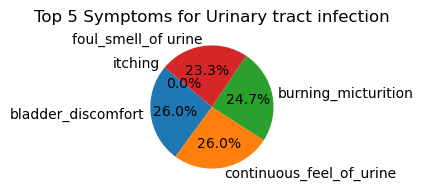

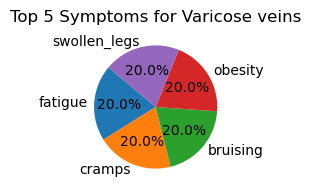

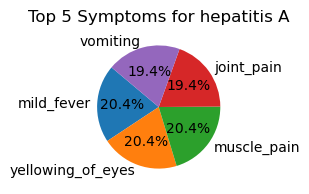

In [46]:


# Plot pie charts for each prognosis and its top symptoms
for prognosis, symptoms in top_symptoms_by_prognosis_filtered.items():
    # Get the counts for the top symptoms
    counts = sum_by_prognosis_filtered.loc[prognosis, symptoms]
    
    # Plot the pie chart
    plt.figure(figsize=(2, 2))
    plt.pie(counts, labels=symptoms, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Symptoms for {prognosis}')
    plt.show()




In [49]:
# Convert relevant columns to numeric, handling errors by converting non-convertible values to NaN
df = data.apply(pd.to_numeric, errors='coerce')

# Recalculate the 95th and 90th percentiles for all numeric columns
percentiles = df.quantile([0.90, 0.95])
percentiles

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,severity_score
0.90,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,13.0
0.95,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,14.0


In [51]:

# Calculate the correlation matrix
correlation_matrix = data.drop('prognosis', axis = 1).corr()

# Select correlations in the range 0.8 to 0.9 (absolute values)
filtered_correlations = correlation_matrix[(correlation_matrix >= 0.8) & (correlation_matrix <= 0.9) & (correlation_matrix != 1.0)]

# Drop rows and columns that are completely NaN (i.e., no correlations in the specified range)
filtered_correlations = filtered_correlations.dropna(how='all').dropna(axis=1, how='all')

# Export the filtered correlations to a CSV file
filtered_correlations.to_csv('filtered_correlations.csv')

# Display the filtered correlations
print(filtered_correlations)


                              nodal_skin_eruptions  shivering  muscle_wasting  \
nodal_skin_eruptions                           NaN        NaN             NaN   
shivering                                      NaN        NaN             NaN   
muscle_wasting                                 NaN        NaN             NaN   
patches_in_throat                              NaN        NaN        0.886395   
sunken_eyes                                    NaN        NaN             NaN   
dehydration                                    NaN        NaN             NaN   
blurred_and_distorted_vision                   NaN        NaN             NaN   
excessive_hunger                               NaN        NaN             NaN   
extra_marital_contacts                         NaN        NaN        0.886395   
bladder_discomfort                             NaN        NaN             NaN   
foul_smell_of urine                            NaN        NaN             NaN   
continuous_feel_of_urine    

In [56]:
prognosis_column = 'prognosis'  # Update this based on the actual name
symptoms_columns = data.drop(columns=[prognosis_column])

# Ensure only numeric columns are used for correlation
numeric_df = symptoms_columns.select_dtypes(include=['number'])

# Calculate the correlation with the prognosis (which should be numeric or already encoded)
correlation_matrix = numeric_df.corrwith(df[prognosis_column])

# Sort the symptoms by their correlation with the prognosis in descending order
sorted_symptoms = correlation_matrix.sort_values(ascending=False)

# Identify the top symptoms (you can choose how many top symptoms you want)
top_symptoms = sorted_symptoms.head(10)  # For example, top 10 symptoms

# Save the results to a DataFrame
top_symptoms_df = pd.DataFrame(top_symptoms, columns=['Correlation'])

# Save the DataFrame to a CSV file
top_symptoms_df.to_csv('top_symptoms_for_prognosis.csv')

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [07:24:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                     Feature  Importance
83        movement_stiffness    0.130838
117         fluid_overload.1    0.130838
119  prominent_veins_on_calf    0.128976
107            mucoid_sputum    0.114007
126      silver_like_dusting    0.033677
..                       ...         ...
105                 polyuria    0.000000
17      cold_hands_and_feets    0.000000
16                   anxiety    0.000000
114         stomach_bleeding    0.000000
88             loss_of_smell    0.000000

[132 rows x 2 columns]


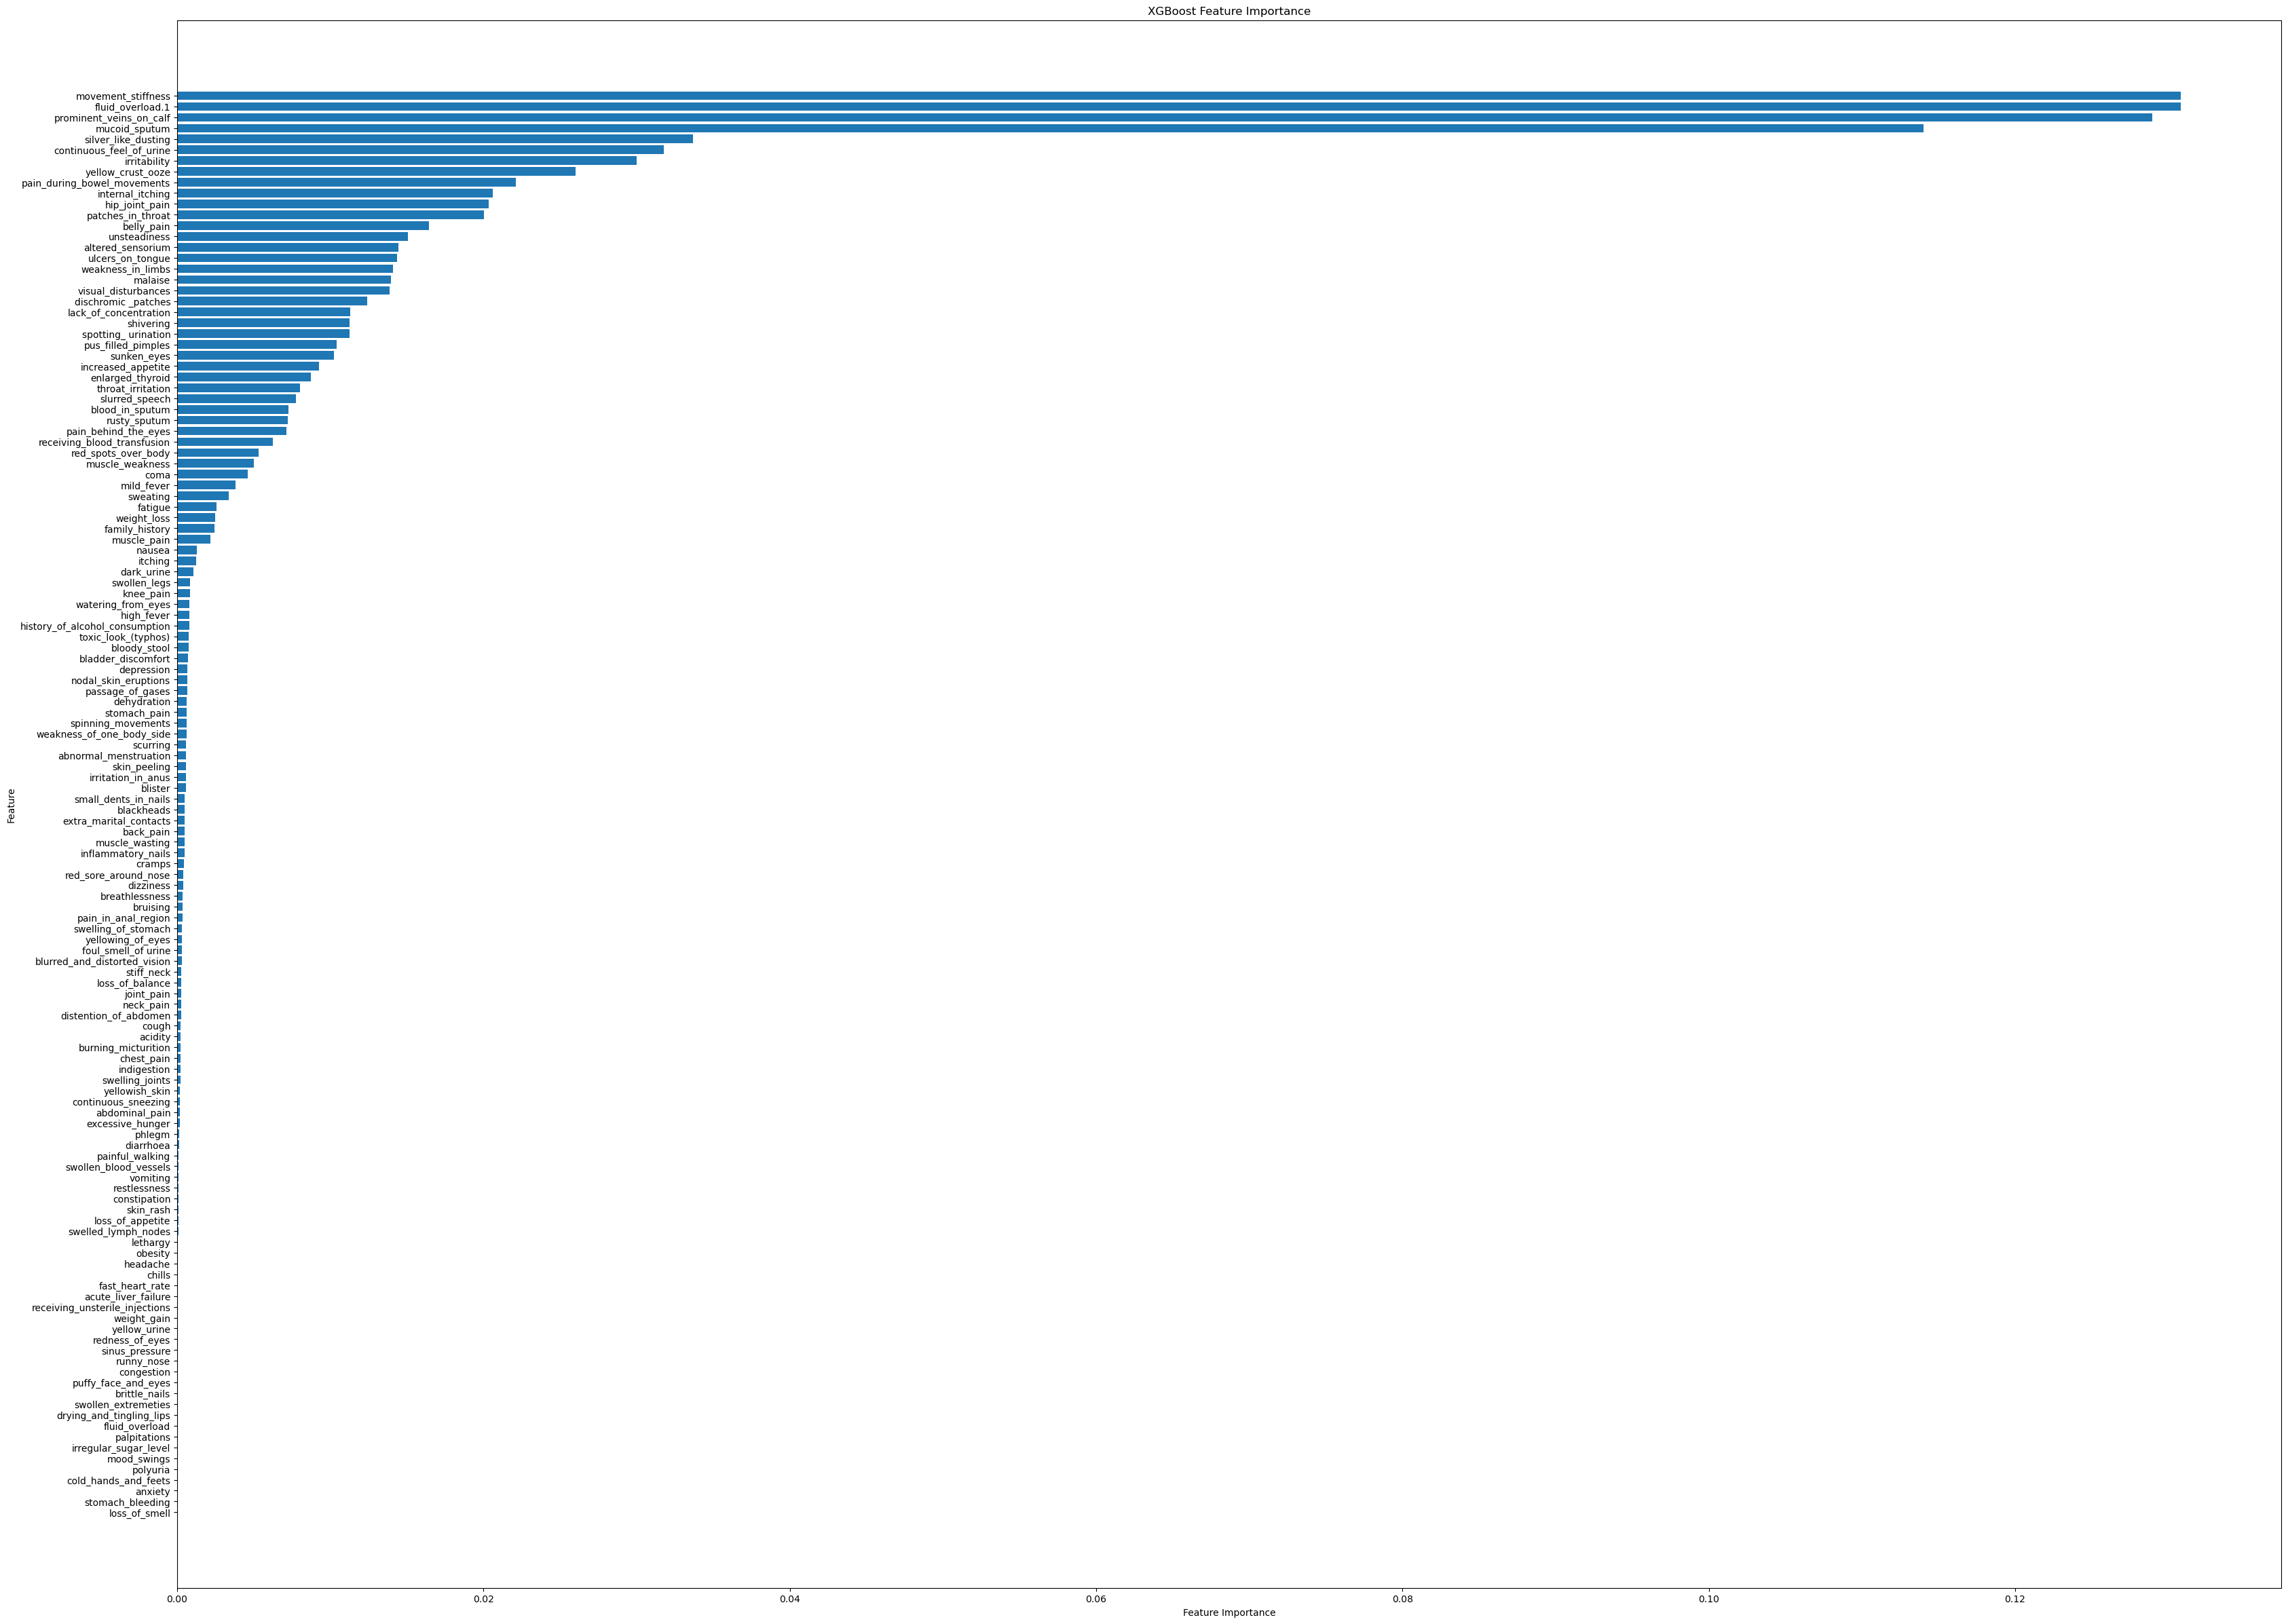

In [92]:
#feature importance using XGboost

# Load the dataset
df = pd.read_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/output.csv')

# Assume the last column is the target variable and the rest are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode the target variable to ensure classes start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importance from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

# Plot feature importance
plt.figure(figsize=(40,30))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


importance_df.to_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/feature_importance.csv', index=False)

In [97]:

# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Identify outliers with a Z-score above a threshold (e.g., 3)
z_outliers = df[(z_scores > 3).any(axis=1)]

print("Outliers detected using Z-score:\n", z_outliers)




Outliers detected using Z-score:
       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0          